In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
# Reading dataset and storing in a variable
players = pd.read_csv('../datasets/player/players_22.csv')

/tmp/ipykernel_38603/2904471527.py:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('../datasets/player/players_22.csv')


In [3]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [4]:
# Creating a list of features which would be our point of interest
features = ['overall', 'potential', 'wage_eur', 'value_eur', 'age']

In [5]:
# Drop any row with empty cell with the list of colums of our poi
players = players.dropna(subset=features)

In [6]:
# Make copy of the dataset for just the poi column and store in a variable
data = players[features].copy()

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


### Steps for Clustering

- Scale the data (rescale max and min so that the values are in range(1, 10) )
- Initialize random Centriods
- Label each data point
- Update centriods
- Repeats steps 3 and 4 until centriods stop changing

In [8]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [9]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [11]:
def random_centroids(data, k):
    centriods = []
    for i in range(k):
        centriod = data.apply(lambda x: float(x.sample()))
        centriods.append(centriod)
    return pd.concat(centriods, axis=1)

In [12]:
centroids = random_centroids(data, 5)

In [13]:
centroids

,0,1,2,3,4
overall,5.695652,4.913043,5.695652,4.717391,4.717391
potential,6.086957,5.304348,4.913043,5.500000,3.934783
wage_eur,1.090129,1.000000,1.115880,1.218884,1.064378
value_eur,1.039017,1.059895,1.069173,1.059895,1.033218
age,4.666667,3.333333,3.333333,3.333333,2.333333


In [14]:
def get_labels(data, centriods):
    distances = centriods.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [15]:
labels = get_labels(data, centroids)

In [16]:
labels

0        0
1        0
2        0
3        0
4        0
        ..
19234    4
19235    4
19236    4
19237    4
19238    4
Length: 19165, dtype: int64

In [17]:
labels.value_counts()

0    7573
3    5712
1    3107
4    2560
2     213
dtype: int64

In [18]:
# We divide the data frame into clusters and apply a function that computes the geometric mean
# of each features (the cluster centriod) to each group to obtain the new centriods.

def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [19]:
# This function transforms our data into 2Dimensional data and plotting our clusters by color and 
# plotting our centriods

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

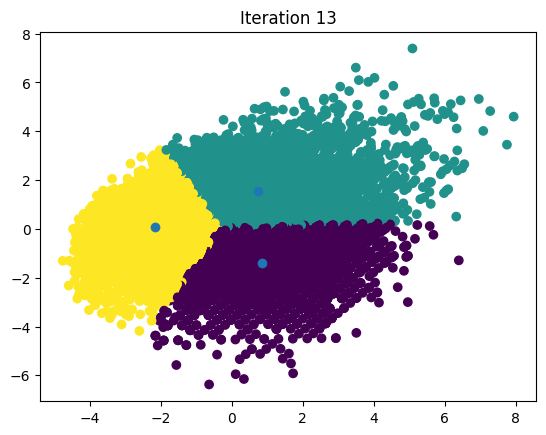

In [20]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [21]:
# Intepreting the output of the plot
centroids

,0,1,2
overall,4.781960,5.807503,3.205672
potential,4.506813,6.497870,4.930905
wage_eur,1.118498,1.420500,1.028564
value_eur,1.044909,1.285685,1.026655
age,5.467648,3.598215,2.514741


In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [24]:
centroids = kmeans.cluster_centers_

In [26]:
# Comparing to sklearn KMeans algorithm
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,4.807435,3.585659,6.217553
potential,4.512004,5.198326,6.620645
wage_eur,1.113900,1.039390,1.651825
value_eur,1.040358,1.035321,1.411348
age,5.606523,2.706936,4.119669
